In [1]:
#import library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score

In [3]:
#read data of stacks
data = pd.read_csv("../input/facebook-recruiting-iii-keyword-extraction/Train.zip")

In [4]:
#printing first 5 rows
data = data.head(100000)

In [5]:
#printing shape , columns and datatypes
print(data.shape)
print(data.columns)
print(data.dtypes)

(100000, 4)
Index(['Id', 'Title', 'Body', 'Tags'], dtype='object')
Id        int64
Title    object
Body     object
Tags     object
dtype: object


In [6]:
#sort values according to title,body and tags
data.sort_values(by = ["Title","Body","Tags"],inplace = True)

In [7]:
#drop duplicate values
data.drop_duplicates(subset = ["Title","Body","Tags"],inplace = True)

In [8]:
#size of data after deleting duplicates rows
data.shape

(99436, 4)

In [9]:
#check whether there is any null values are present or not
data.isnull().any()

Id       False
Title    False
Body     False
Tags     False
dtype: bool

In [10]:
#drop all null value columns
data = data.dropna()

In [11]:
#shape of data after deleting null values
data.shape

(99436, 4)

In [12]:
#now as we can see there is no null values
data.isnull().any()

Id       False
Title    False
Body     False
Tags     False
dtype: bool

In [13]:
#creating new column of no. of tags assigned to each rows
data["tag_count"] = data["Tags"].apply(lambda x : len(x.split(" ")))

In [14]:
data.head()

,Id,Title,Body,Tags,tag_count
4749,4750,Accessing @Local Session Bean from an exposed...,<p>What I am trying to do should be very strai...,ejb resteasy,2
35719,35720,Encoding of sent data not working,"<p>I've got a little chatbox, everything's wor...",php jquery ajax encoding,4
76895,76896,"Files in Array, in Array to Tree?","<p>Using <code>C#</code>, I have created a pro...",c# visual-studio-2010 visual-studio-2008 clear...,4
46994,46995,Google Map location based on address,"<p>Im using Google Map in my application, it i...",android google-maps,2
46671,46672,How to insert custom field in typo3 Dam modul...,<p>I introduced my custom field in Dam modules...,typo3 dam,2


In [15]:
#count values of no.of tag
data["tag_count"].value_counts()

3    28603
2    26384
4    19009
1    13784
5    11656
Name: tag_count, dtype: int64

In [16]:
#converting tag matrix in vector
CoVec = CountVectorizer(tokenizer = (lambda x : x.split(" ")))
tag_vec = CoVec.fit_transform(data["Tags"])

In [17]:
print("Number of datapoint : " , tag_vec.shape[0])
print("Number of tag : " , tag_vec.shape[1] )

Number of datapoint :  99436
Number of tag :  18448


In [18]:
type(tag_vec)

scipy.sparse.csr.csr_matrix

In [19]:
#getting all tags
tag = CoVec.get_feature_names()
print(tag[:10])
print(len(tag))

['.a', '.bash-profile', '.class-file', '.each', '.emf', '.hgtags', '.htaccess', '.htpasswd', '.mov', '.net']
18448


In [20]:
#count freq of tag how many time it is appearing
freq = tag_vec.sum(axis = 0).A1
print(freq.shape)
freq[0].dtype

(18448,)


dtype('int64')

In [21]:
tag_freq = pd.DataFrame(freq.T,columns = ["freq"])
tag_freq["tag"] = tag
tag_freq.head()

,freq,tag
0,2,.a
1,1,.bash-profile
2,1,.class-file
3,6,.each
4,2,.emf


In [22]:
tag_freq["freq"] = tag_freq["freq"].values.astype('int')

In [23]:
tag_freq.sort_values(by = ['freq'],ascending= False,inplace=True)

In [24]:
tag_freq.head(20)

,freq,tag
2010,7745,c#
8044,6753,java
11936,6545,php
8086,6102,javascript
569,5287,android
8294,4925,jquery
2017,3258,c++
12719,3063,python
7870,3038,iphone
1043,2918,asp.net


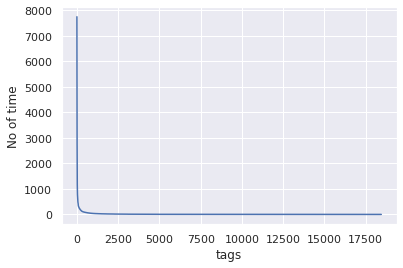

In [25]:
plt.plot(tag_freq['freq'].values)
plt.ylabel("No of time")
plt.xlabel("tags")
plt.show()

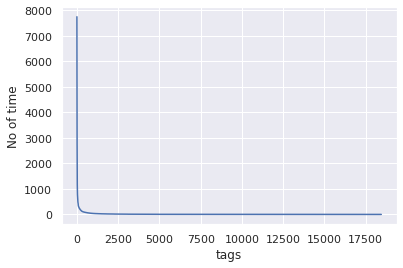

In [26]:
plt.plot(tag_freq['freq'].values[0:20000])
plt.ylabel("No of time")
plt.xlabel("tags")
plt.show()

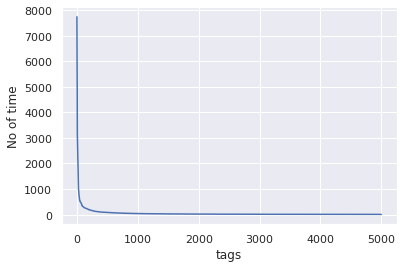

In [27]:
plt.plot(tag_freq['freq'].values[0:5000])
plt.ylabel("No of time")
plt.xlabel("tags")
plt.show()

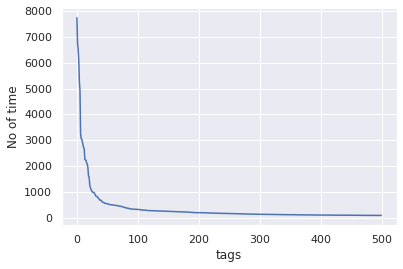

In [28]:
plt.plot(tag_freq['freq'].values[0:500])
plt.ylabel("No of time")
plt.xlabel("tags")
plt.show()

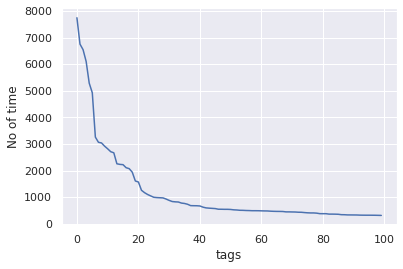

In [29]:
plt.plot(tag_freq['freq'].values[0:100])
plt.ylabel("No of time")
plt.xlabel("tags")
plt.show()

In [30]:
print("Number of tags more than 10000 times : " ,len(tag_freq[tag_freq.freq > 1000].tag))
print("Number of tags more than 10000 times : " ,len(tag_freq[tag_freq.freq > 10000].tag))

Number of tags more than 10000 times :  25
Number of tags more than 10000 times :  0


In [31]:
#coount no. of tag in each question
tag_count_vec = tag_vec.sum(axis = 1).tolist()
tag_count_vec = [int(j) for i in tag_count_vec for j in i]

In [32]:
print(tag_count_vec[:5])
print(len(tag_count_vec))

[2, 4, 4, 2, 2]
99436


In [33]:
print("Maximum number of tag in any question",max(tag_count_vec))
print("Minimum number of tag in any question",min(tag_count_vec))

Maximum number of tag in any question 5
Minimum number of tag in any question 1


In [34]:
print("Average number of tag in any question ", sum(tag_count_vec)/len(tag_count_vec))

Average number of tag in any question  2.8830302908403396


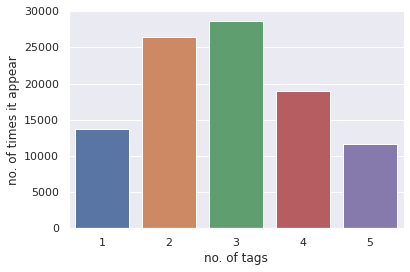

In [35]:
sns.countplot(tag_count_vec)
plt.xlabel("no. of tags")
plt.ylabel("no. of times it appear")
plt.show()

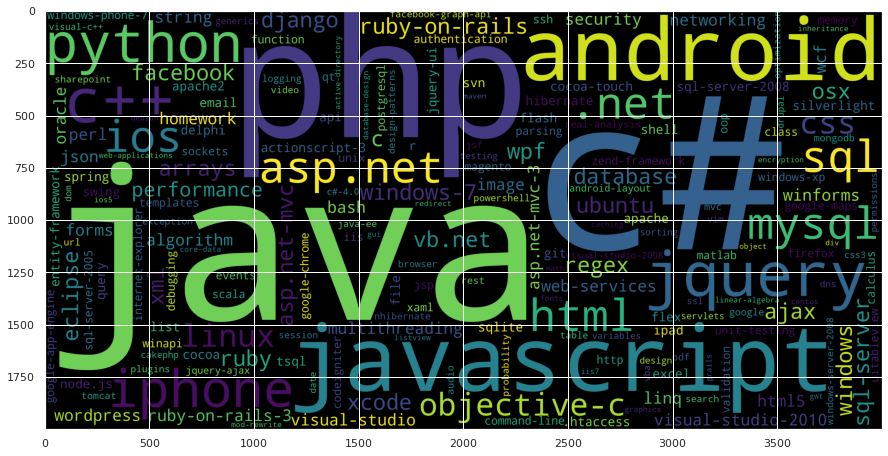

In [36]:
tup = {x:y for x in tag_freq["tag"] for y in tag_freq["freq"]}
wordcloud = WordCloud(background_color='black',height = 2000, width = 4000).generate_from_frequencies(tup)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)

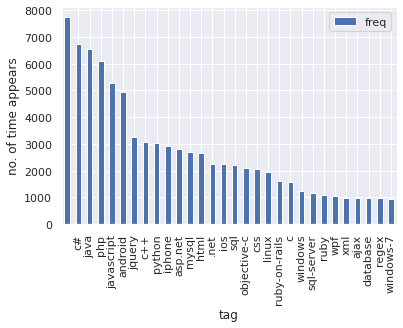

In [37]:
tag_freq.head(30).plot(kind="bar")
plt.xticks(range(1,30),tag_freq['tag'])
plt.xlabel("tag")
plt.ylabel("no. of time appears")
plt.show()

In [38]:
question_list = []
stop_words = set(stopwords.words("english"))
stemmer = SnowballStemmer("english")

for index ,row in data.iterrows():
    title , body , tags = row["Title"] , row["Body"] , row["Tags"]
    
    body = re.sub("<code>(.*?)</code>",' ',body,flags= re.MULTILINE | re.DOTALL)
    body = re.sub("<.*?>"," ",str(body.encode("utf-8")))
    title = title.encode("utf-8")
    question = str(title) + " " + str(title) + " " + str(title) + " " + str(body)
    question = re.sub(r"[^A-Za-z]+"," ",question)
    words = word_tokenize(str(question.lower()))
    question  = " ".join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j) != 1))
    question_list.append(question)

In [39]:
len(question_list)

99436

In [40]:
data["question"] = question_list

In [41]:
data["question"].isnull().any()

False

In [42]:
CoVec = CountVectorizer(tokenizer = lambda x : x.split() , binary=True)
y_multilabel = CoVec.fit_transform(data["Tags"])

In [43]:
y_multilabel.shape

(99436, 18448)

In [44]:
#in tags_t0_consider, nested matrix return and we convert it into list and it is nested hence index 0
# in sorted, key represent on which basis we want to sorted , it is actually working like argsort in reverse

def tags_to_consider(n):
    tag_i_sum = y_multilabel.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(tag_i_sum)), key=lambda i: tag_i_sum[i], reverse=True)
    yn_multilabel=y_multilabel[:,sorted_tags_i[:n]]
    return yn_multilabel

def questions_covered_fn(numb):
    yn_multilabel = tags_to_consider(numb)
    x= yn_multilabel.sum(axis=1)
    return (np.count_nonzero(x==0))

In [45]:
questions_covered = []
total_tags=y_multilabel.shape[1]
total_qus=data.shape[0]
for i in range(100, total_tags, 100):
    questions_covered.append(np.round(((total_qus-questions_covered_fn(i))/total_qus)*100,3))

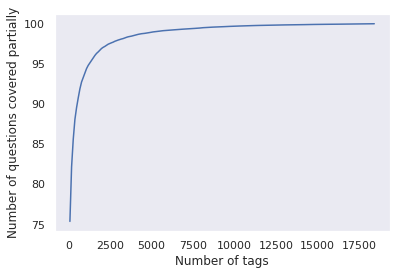

93.879 % of questions covered by 1000 tags
Number of questions that are not covered by 100 tags :  6086 out of  99436


In [46]:
plt.plot(np.arange(100,total_tags, 100),questions_covered)
plt.xlabel("Number of tags")
plt.ylabel("Number of questions covered partially")
plt.grid()
plt.show()
print(questions_covered[9],"% of questions covered by 1000 tags")
print("Number of questions that are not covered by 100 tags : ", questions_covered_fn(1000),"out of ", total_qus)

In [47]:
yx_multilabel = tags_to_consider(1000)
print("Number of tags in the subset :", y_multilabel.shape[1])
print("Number of tags considered :", yx_multilabel.shape[1],"(",(yx_multilabel.shape[1]/y_multilabel.shape[1])*100,"%)")

Number of tags in the subset : 18448
Number of tags considered : 1000 ( 5.420641803989593 %)


In [48]:
x_train , x_test , y_train , y_test = train_test_split(data , yx_multilabel ,test_size = 0.2)

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(79548, 6)
(79548, 1000)
(19888, 6)
(19888, 1000)


In [50]:
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, tokenizer = lambda x: x.split(), ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'].values.astype(str))
x_test_multilabel = vectorizer.transform(x_test['question'].values.astype(str))

In [51]:
#using direct implementation of Logistic Regression
clf2 = OneVsRestClassifier(LogisticRegression(penalty='l2'),n_jobs=-1)
clf2.fit(x_train_multilabel, y_train)
y_pred2 = clf2.predict(x_test_multilabel)

In [52]:
print("Macro f1 score :",metrics.f1_score(y_test, y_pred2, average = 'macro'))
print("Micro f1 score :",metrics.f1_score(y_test, y_pred2, average = 'micro'))
print("Hamming loss :",metrics.hamming_loss(y_test,y_pred2))

Macro f1 score : 0.10043501556177806
Micro f1 score : 0.32870273059064076
Hamming loss : 0.0017664420756234916
